by following the machine learning handbook online
https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb

In [2]:
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

# simple linear regression 

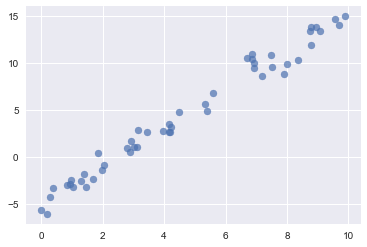

In [3]:
rng = np.random.RandomState(1)

x = 10 * rng.rand(50)

# designed relation
# the last rng.rand(50) is the jitter term
y = 2 * x - 5 + rng.randn(50)

plt.scatter(x, y, alpha = 0.7)

** newaxis ** is also called as a pseudo-index that allows the temporary addition of an axis into a multiarray.

np.newaxis uses the slicing operator to recreate the array while np.reshape reshapes the array to the desired layout (assuming that the dimensions match; this is must for a reshape to happen).

use np.newaxis to increase the dimension of one of the arrays so that numpy can broadcast.

x1_new = x1[:, np.newaxis]

Now, add:

x1_new + x2

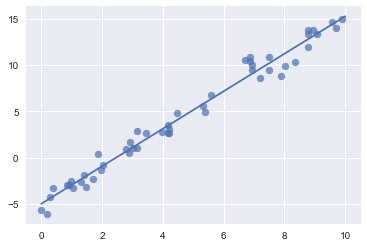

In [4]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression(fit_intercept = True)

# x[:, np.newaxis], expand one more dimension for the intercept 
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, alpha = 0.7)
plt.plot(xfit, yfit)

In [5]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.02720881036
Model intercept: -4.99857708555


SLR model results are very close to the inputs.

The LinearRegression estimator is much more capable than this. It can also handle multidimensional linear models of the form $$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$ where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

In [6]:
rng = np.random.RandomState(1)

# three dimensional data - matrix multiplication 
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5
[ 1.5 -2.   1. ]


** Linear Regression Model** can be used to fit lines, planes, or hyperplanes for the data. 

# Basis Function Regression

One trick to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions. 

The idea is to take the multidimensional linear model: $$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$ and build the $x_1, x_2, x_3,$ and so on, from the single-dimensional input $x$. That is, let $x_n = f_n(x)$, where $f_n()$ is some function that transforms the data.

For example, if $f_n(x) = x^n$, the model becomes a polynomial regression: $$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$ Notice that this is still a linear model—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other. What have been effectively done is taking the one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### polynomial basis function

In [33]:
rng = np.random.RandomState(1)

x = 10 * rng.rand(50)
# non linear relation
y = np.sin(x) + 0.1 * rng.randn(50)

xfit = np.linspace(0, 10, 1000)

In [10]:
# 3th & 7th & 20th degree polynomial regression model in Pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# poly_model_3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model_7 = make_pipeline(PolynomialFeatures(7), LinearRegression())
poly_model_20 = make_pipeline(PolynomialFeatures(20), LinearRegression())

In [11]:
def pipeline_train(model, x):
    
    model.fit(x[:, np.newaxis], y)
    yfit = model.predict(xfit[:, np.newaxis])
  
    return (yfit)

(-1.5, 1.5)

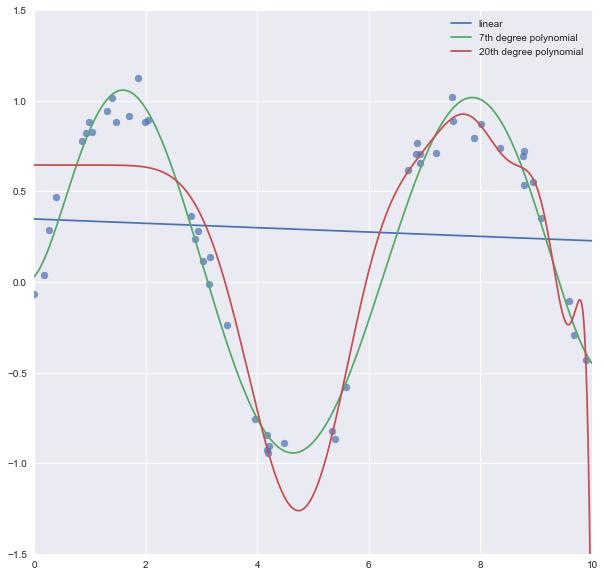

In [34]:
fig = plt.figure(figsize = (10, 10))

linear = LinearRegression(fit_intercept = True)

linear.fit(x[:, np.newaxis], y)
yfit = linear.predict(xfit[:, np.newaxis])

yfit7 = pipeline_train(poly_model_7, x)
yfit20 = pipeline_train(poly_model_20, x)

plt.scatter(x, y, alpha = 0.7)

plt.plot(xfit, yfit, label = 'linear')
plt.plot(xfit, yfit7,  label = '7th degree polynomial')
plt.plot(xfit, yfit20, label = '20th degree polynomial')

plt.legend()

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

## Bias and variance trade off with polynomial regression models

In [58]:
rng = np.random.RandomState(1)

x = 10 * rng.rand(50)
# non linear relation
y = np.sin(x) + 0.1 * rng.randn(50)

xfit = np.linspace(0, 10, 1000)

In [59]:
def pipeline_train(model, x):
    
    model.fit(x[:, np.newaxis], y)
    yfit = model.predict(xfit[:, np.newaxis])
  
    return (yfit)


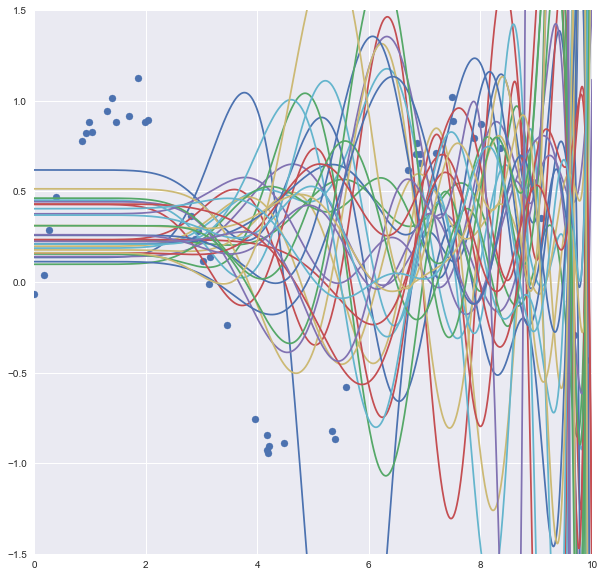

In [76]:
# shuffle the original dataset x with random_state = 1 and train, plot all the results 
from sklearn.utils import resample

arr_fit = np.empty(1000)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(x, y)

for i in range(30):

#     x_i = resample(x, random_state = 0)
    x_i = resample(x)
    
    yfit_i = pipeline_train(poly_model_20, x_i)
    np.append(arr_fit, np.array(yfit), axis=0)

    plt.plot(xfit, yfit_i)
    
    plt.xlim(0, 10)
    plt.ylim(-1.5, 1.5)

In [78]:
arr_fit.shape


(31000,)

In [66]:
.shapelen(yfit_all[0])

1000

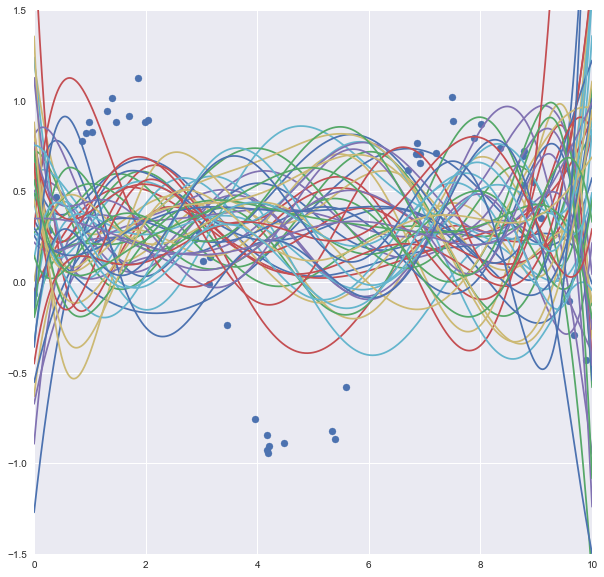

In [53]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(x, y)

for i in range(50):

    x_i = resample(x)
    
    yfit_i = pipeline_train(poly_model_7, x_i)

    plt.plot(xfit, yfit_i)
    
    plt.xlim(0, 10)
    plt.ylim(-1.5, 1.5)
    

## Regularization with polynomial regression models 

In [39]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# 20th degree polynomial function overfits the data 
poly_model_20 = make_pipeline(PolynomialFeatures(20), LinearRegression())

poly_model_ridge = make_pipeline(PolynomialFeatures(20), Ridge(alpha = 0.5))
poly_model_lasso = make_pipeline(PolynomialFeatures(20), Lasso(alpha = 0.005))

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.626904625663006e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-1.5, 1.5)

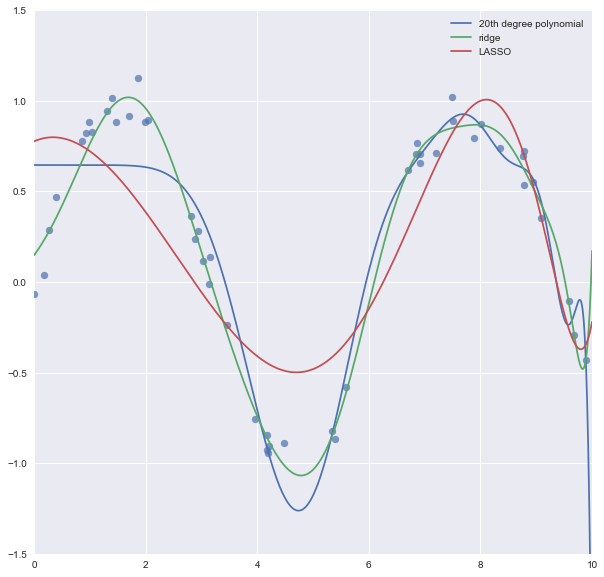

In [40]:
fig = plt.figure(figsize = (10, 10))

yori = pipeline_train(poly_model_20, x)
yridge = pipeline_train(poly_model_ridge, x)
ylasso = pipeline_train(poly_model_lasso, x)

plt.scatter(x, y, alpha = 0.7)

plt.plot(xfit, yori, label = '20th degree polynomial')
plt.plot(xfit, yridge, label = 'ridge')
plt.plot(xfit, ylasso, label = 'LASSO')

plt.legend()

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

#### Gaussian Basis Functions

sum of Gaussian Bases

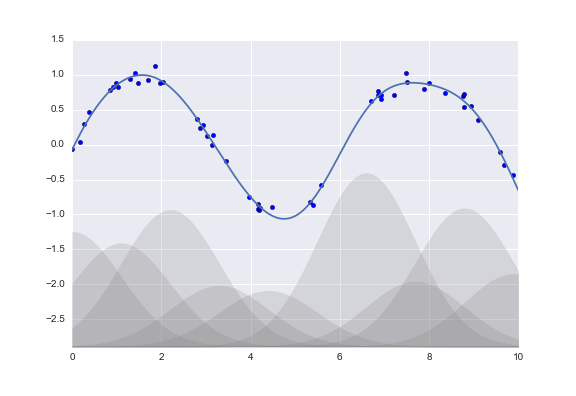

In [175]:
# Gaussian Basis functions are not built in sklearn

from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor = 2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis = None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

    

(-1.5, 1.5)

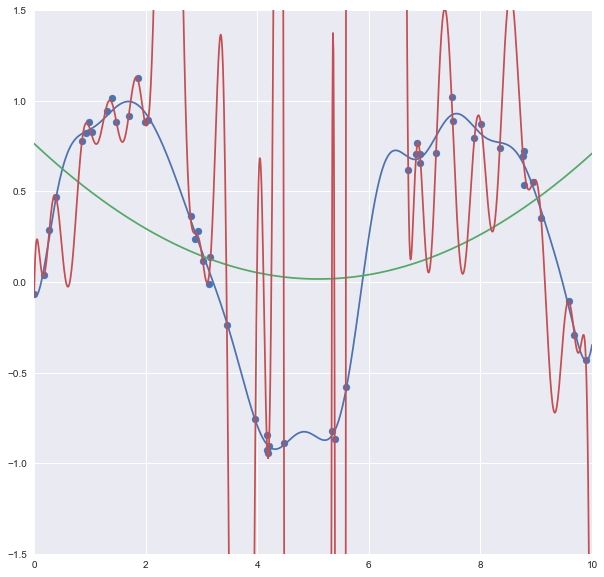

In [206]:
fig = plt.figure(figsize = (10, 10))

# 20 Gaussian Basis functions  
gauss_model_20 = make_pipeline(GaussianFeatures(20), LinearRegression())

gauss_model_20.fit(x[:, np.newaxis], y)
yfit_gauss_20 = gauss_model.predict(xfit[:, np.newaxis])

# 20 Gaussian Basis functions  
gauss_model_2 = make_pipeline(GaussianFeatures(2), LinearRegression())

gauss_model_2.fit(x[:, np.newaxis], y)
yfit_gauss_2 = gauss_model_2.predict(xfit[:, np.newaxis])


# 40 Gaussian Basis functions  
gauss_model_40 = make_pipeline(GaussianFeatures(40), LinearRegression())

gauss_model_40.fit(x[:, np.newaxis], y)
yfit_gauss_40 = gauss_model_40.predict(xfit[:, np.newaxis])


plt.scatter(x, y)
plt.plot(xfit, yfit_gauss_20)
plt.plot(xfit, yfit_gauss_2)
plt.plot(xfit, yfit_gauss_40)

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data. Explore the reason for this by plotting the coefficients of the Gaussian bases with respect to their locations.

# Regularization

In [177]:

def basis_plot(model, title=None):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(2, 1, 1)
    model.fit(x[:, np.newaxis], y)
    ax.scatter(x, y)
    ax.plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax.set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    ax2 = fig.add_subplot(2, 1, 2)
    if title:
        ax.set_title(title)

    ax2.plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax2.set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))

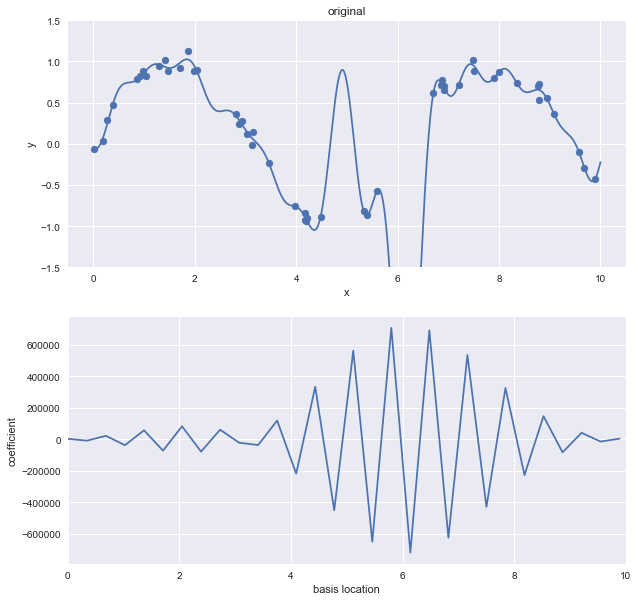

In [178]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model, title = 'original')

The lower panel of this figure shows the amplitude of the basis function at each location. This is typical over-fitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out.

It would be nice if such spikes can be limited expliticly in the model by penalizing large values of the model parameters. Such a penalty is known as regularization, and comes in several forms.

### Ridge Regression

This regularization is achieved by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit is $$
P = \alpha\sum_{n=1}^N \theta_n^2
$$ where $\alpha$ is a free parameter that controls the strength of the penalty.

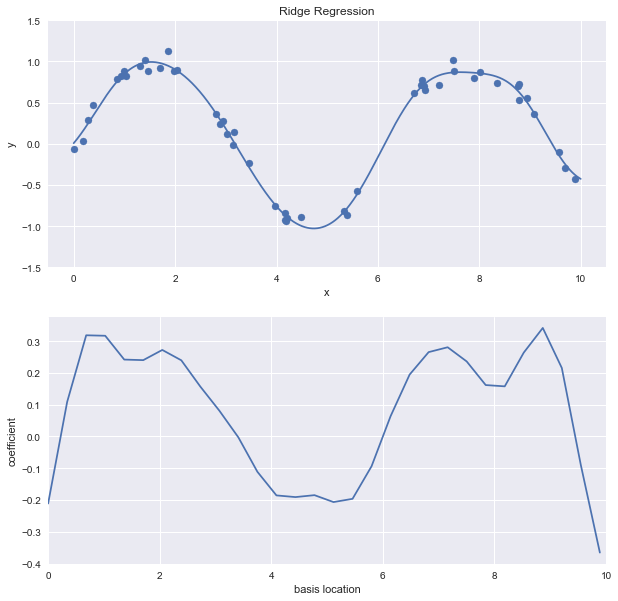

In [180]:
from sklearn.linear_model import Ridge

model_ridge = make_pipeline(GaussianFeatures(30), Ridge(alpha = 0.1))
model_ridge.fit(x[:, np.newaxis], y)

basis_plot(model_ridge, title = 'Ridge Regression')

### LASSO  

Involves penalizing the sum of absolute values (1-norms) of regression coefficients: $$
P = \alpha\sum_{n=1}^N |\theta_n|
$$ Due to geometric reasons lasso regression tends to favor sparse models where possible: that is, it preferentially sets model coefficients to exactly zero.

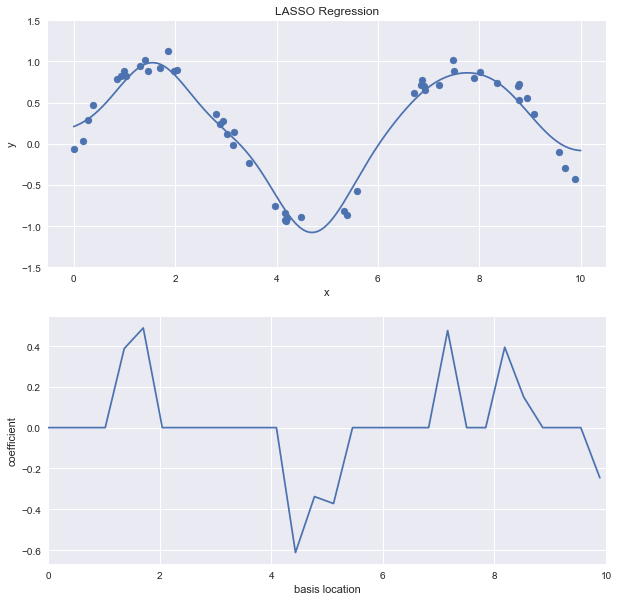

In [185]:

from sklearn.linear_model import Lasso

model_ridge = make_pipeline(GaussianFeatures(30), Lasso(alpha = 0.01))
model_ridge.fit(x[:, np.newaxis], y)

basis_plot(model_ridge, title = 'LASSO Regression')